In [5]:
import os
from PIL import Image
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

In [6]:

sample_path_2 = r"C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\sca2_ataxia_dti_data\sub-SCA203\ses-01\anat\sub-SCA203_ses-01_T1w.nii.gz"

nifti_img_2 = nib.load(sample_path_2)

In [7]:
# Access the header information
header = nifti_img_2.header

# Get the data type and data shape
data_type = header.get_data_dtype()
data_shape = header.get_data_shape()

print(f"Data Type: {data_type}")
print(f"Data Shape: {data_shape}")


Data Type: int16
Data Shape: (256, 256, 160)


In [8]:
# Access the header information
nifti_img_3 = nib.load(r"C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\implem\dwi\control_ses1_dwi_niigz\sub-control02_ses-01_dwi.nii.gz")

header = nifti_img_3.header

# Get the data type and data shape
data_type = header.get_data_dtype()
data_shape = header.get_data_shape()

print(f"Data Type: {data_type}")
print(f"Data Shape: {data_shape}")

Data Type: int16
Data Shape: (128, 128, 50, 16)


In [9]:
# Get the image data as a NumPy array
data = nifti_img_2.get_fdata()

# Specify the slice index (11th slice)
slice_index = 10  # Adjust to display the 11th slice (0-based index)

# Access the selected slice
slice_data = data[:, :, slice_index]

# Check data type and range
print(f"Data Type: {slice_data.dtype}")
print(f"Data Range: {np.min(slice_data)} to {np.max(slice_data)}")

# Normalize the data to the range [0, 255] and cast to uint8 for display
slice_data = ((slice_data - np.min(slice_data)) / (np.max(slice_data) - np.min(slice_data)) * 255).astype(np.uint8)


Data Type: float64
Data Range: 0.0 to 2642.7758574038744


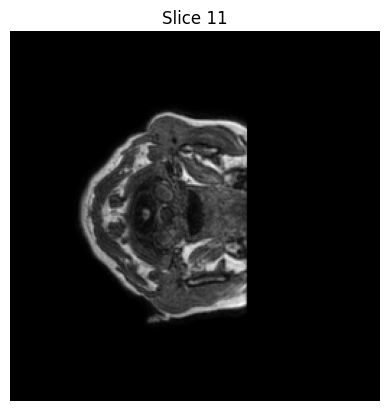

In [10]:
# Get the image data as a NumPy array
data = nifti_img_2.get_fdata()

# Specify the slice index (11th slice)
slice_index = 10  # Adjust to display the 11th slice (0-based index)

# Display the selected slice
slice_data = data[:, :, slice_index]
slice_data = ((slice_data - np.min(slice_data)) / (np.max(slice_data) - np.min(slice_data)) * 255).astype(np.uint8)

plt.imshow(slice_data, cmap='gray')
plt.title(f'Slice {slice_index + 1}')  # Adding 1 to the index for display
plt.axis('off')
plt.show()


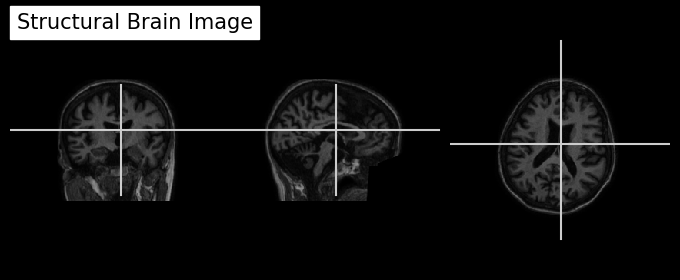

In [11]:


# Specify the path to your structural brain image (in NIfTI format)
image_path = sample_path_2

# Load the image using nibabel
image = nib.load(image_path)

# Create a plot to visualize the structural image
plotting.plot_anat(image, title="Structural Brain Image", display_mode='ortho', cut_coords=None, annotate=False)

# Display the plot
plotting.show()

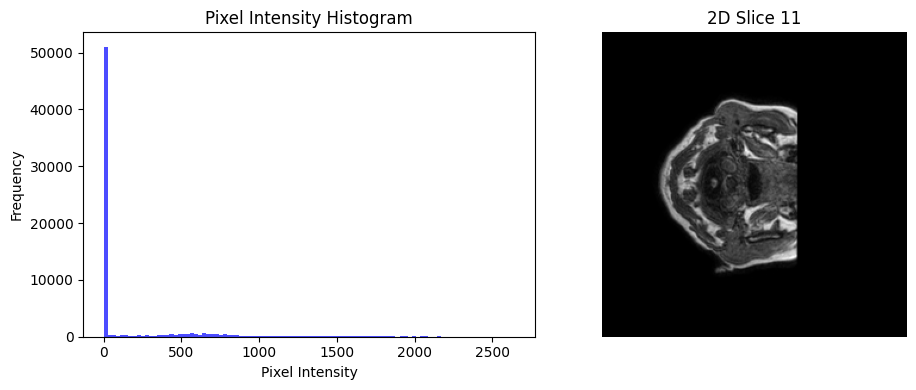

In [12]:


def visualize_image(image_path, slice_index=0):
    # Load the NIfTI image
    nifti_img = nib.load(image_path)

    # Get the image data as a NumPy array
    image_data = nifti_img.get_fdata()

    # Access the selected 2D slice
    slice_data = image_data[:, :, slice_index]  # This is for a 3D image

    # Create a histogram of pixel intensities
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(slice_data.flatten(), bins=100, color='blue', alpha=0.7)
    plt.title('Pixel Intensity Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Display the 2D slice
    plt.subplot(1, 2, 2)
    plt.imshow(slice_data, cmap='gray')
    plt.title(f'2D Slice {slice_index + 1}')  # Adding 1 to the index for display
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
image_path = sample_path_2 # Replace with the path to your NIfTI image
visualize_image(image_path, slice_index=10)  # Display the 11th slice


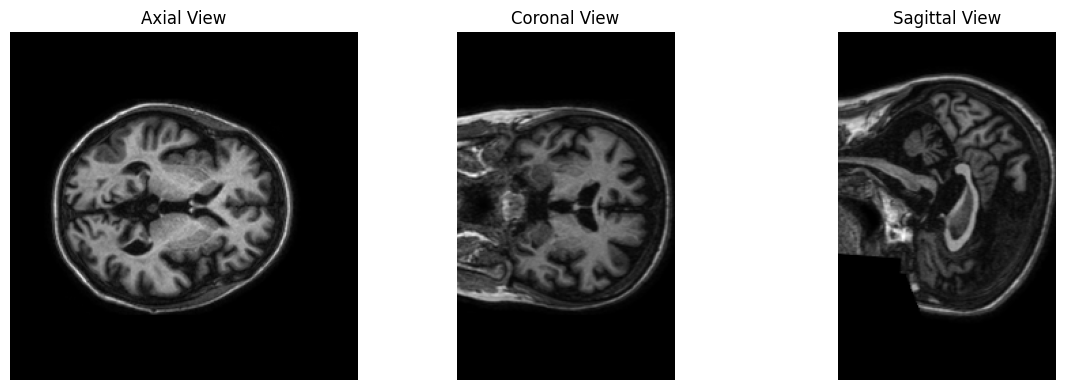

In [13]:


def create_multiplanar_views(image_path):
    # Load the NIfTI image
    nifti_img = nib.load(image_path)

    # Get the image data as a NumPy array
    image_data = nifti_img.get_fdata()

    # Create multi-planar views (axial, coronal, and sagittal)
    # Axial view
    axial_slice = image_data[:, :, image_data.shape[2] // 2]
    # Coronal view
    coronal_slice = image_data[:, image_data.shape[1] // 2, :]
    # Sagittal view
    sagittal_slice = image_data[image_data.shape[0] // 2, :, :]

    # Display the multi-planar views
    plt.figure(figsize=(12, 4))
    
    plt.subplot(131)
    plt.imshow(axial_slice, cmap='gray')
    plt.title('Axial View')
    plt.axis('off')
    
    plt.subplot(132)
    plt.imshow(coronal_slice, cmap='gray')
    plt.title('Coronal View')
    plt.axis('off')
    
    plt.subplot(133)
    plt.imshow(sagittal_slice, cmap='gray')
    plt.title('Sagittal View')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
image_path = sample_path_2  # Replace with the path to your NIfTI image
create_multiplanar_views(image_path)


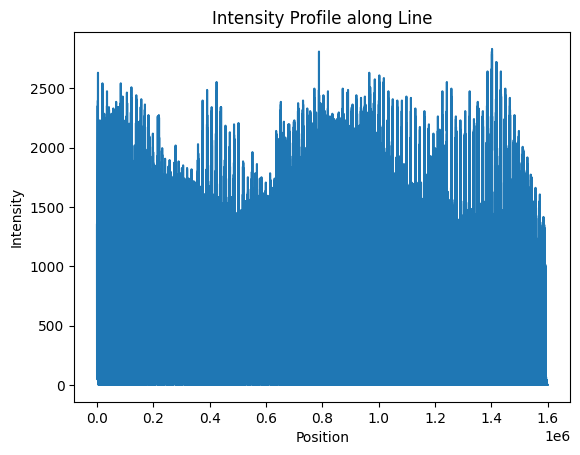

In [14]:
def generate_intensity_profile(image_path, start_point, end_point):
    # Load the NIfTI image
    nifti_img = nib.load(image_path)

    # Get the image data as a NumPy array
    image_data = nifti_img.get_fdata()

    # Extract the line profile
    x0, y0, x1, y1 = start_point[0], start_point[1], end_point[0], end_point[1]
    line_profile = image_data[y0:y1, x0:x1].flatten()  # Flatten the line profile to 1D

    # Plot the intensity profile
    plt.plot(line_profile)
    plt.title('Intensity Profile along Line')
    plt.xlabel('Position')
    plt.ylabel('Intensity')
    plt.show()

# Example usage:
image_path = sample_path_2  # Replace with the path to your NIfTI image
start_point = (100, 100)  # Replace with your desired start point
end_point = (200, 200)    # Replace with your desired end point
generate_intensity_profile(image_path, start_point, end_point)


In [15]:

# Specify the path to your NIfTI image
image_path = sample_path_2

# Load the NIfTI image
nifti_img = nib.load(image_path)

# Get the image data as a NumPy array
image_data = nifti_img.get_fdata()

# Define the coordinates of the ROI
x_start, y_start = 100, 100  # Replace with your desired starting coordinates
x_end, y_end = 200, 200      # Replace with your desired ending coordinates

# Extract the ROI
roi = image_data[y_start:y_end, x_start:x_end]

# Calculate statistics
roi_mean = np.mean(roi)
roi_median = np.median(roi)
roi_std = np.std(roi)

print(f"Mean Intensity in ROI: {roi_mean}")
print(f"Median Intensity in ROI: {roi_median}")
print(f"Standard Deviation of Intensity in ROI: {roi_std}")


Mean Intensity in ROI: 435.4549544120977
Median Intensity in ROI: 312.2113655805588
Standard Deviation of Intensity in ROI: 429.7363606531092


In [16]:

# Load the NIfTI image
nifti_img = nib.load(sample_path_2)

# Print the header information to see available field names
print(nifti_img.header)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'?TR:8.179 TE:3.74'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 160   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         1.         1.         1.         0.0081792  1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b'ROSATI ELSA '
aux_file        : b'MR000001'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.061053216
quatern_c       : 0.9981345
quatern_d       : 0.0
qoffset_x 

In [17]:
# # Specify the path to your 4D NIfTI file
# nifti_path = r"C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\implem\control_ses1_dwi_niigz\sub-control02_ses-01_dwi.nii.gz"

# # Specify the target directory to save the axial slice as a PNG
# target_dir = r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\implem\control_ses1_dwi_2d'

# # Ensure the target directory exists
# os.makedirs(target_dir, exist_ok=True)

# # Load the 4D NIfTI image
# nifti_img = nib.load(nifti_path)

# # Extract the axial slice (2D)
# slice_number = 8  # Change this to the desired axial slice number
# slice_data = nifti_img.dataobj[:, :, slice_number, 0]

# # Save the 2D axial slice as a PNG file
# slice_filename = os.path.join(target_dir, f'axial_slice_{slice_number}.png')
# plt.imsave(slice_filename, slice_data, cmap='gray')

# print(f"Axial 2D slice saved as {slice_filename}.")


In [18]:

# # Load the NIfTI image
# nifti_img = nib.load(sample_path_2)  # Replace with your image path

# # Get the image data as a NumPy array
# data = nifti_img.get_fdata()

# # Specify the slice index (11th slice)
# slice_index = 79 # Adjust to display the 11th slice (0-based index)

# # Display the selected slice
# slice_data = data[:, :, slice_index]
# slice_data = ((slice_data - np.min(slice_data)) / (np.max(slice_data) - np.min(slice_data)) * 255).astype(np.uint8)

# # Save the slice as a PNG in the target directory
# target_dir = r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\implem\control_ses1_dwi_2d'  # Replace with your target directory
# os.makedirs(target_dir, exist_ok=True)

# # Define the slice filename
# slice_filename = os.path.join(target_dir, f'slice_{slice_index + 1}.png')  # Adding 1 to the index for the filename

# # Save the slice as a PNG
# plt.imsave(slice_filename, slice_data, cmap='gray')

# # Display the saved image
# plt.imshow(slice_data, cmap='gray')
# plt.title(f'Slice {slice_index + 1}')
# plt.axis('off')
# plt.show()

# # Print the path where the slice is saved
# print(f'Slice saved as {slice_filename}')


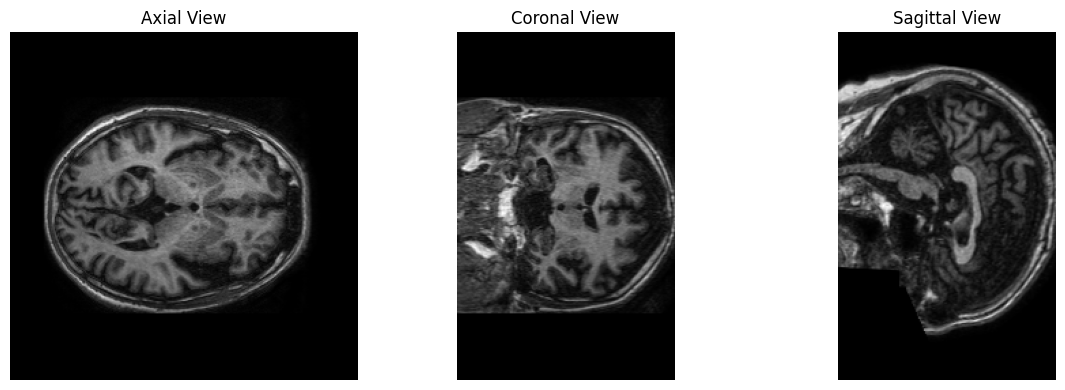

In [19]:
## NIFT to 2d in target dir

def create_multiplanar_views(image_path, target_dir):
    # Load the NIfTI image
    nifti_img = nib.load(image_path)

    # Get the image data as a NumPy array
    image_data = nifti_img.get_fdata()

    # Create multi-planar views (axial, coronal, and sagittal)
    # Axial view
    axial_slice = image_data[:, :, image_data.shape[2] // 2]
    # Coronal view
    coronal_slice = image_data[:, image_data.shape[1] // 2, :]
    # Sagittal view
    sagittal_slice = image_data[image_data.shape[0] // 2, :, :]

    # Get the source file's name (without extension)
    source_filename = os.path.splitext(os.path.basename(image_path))[0]

    # Save the slices as PNG images in the target directory
    os.makedirs(target_dir, exist_ok=True)

    # Save with the source file's name as a prefix
    plt.imsave(os.path.join(target_dir, f'{source_filename}_axial_slice.png'), axial_slice, cmap='gray')
    plt.imsave(os.path.join(target_dir, f'{source_filename}_coronal_slice.png'), coronal_slice, cmap='gray')
    plt.imsave(os.path.join(target_dir, f'{source_filename}_sagittal_slice.png'), sagittal_slice, cmap='gray')

    # Display the multi-planar views
    plt.figure(figsize=(12, 4))

    plt.subplot(131)
    plt.imshow(axial_slice, cmap='gray')
    plt.title('Axial View')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(coronal_slice, cmap='gray')
    plt.title('Coronal View')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(sagittal_slice, cmap='gray')
    plt.title('Sagittal View')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    
trans_path = r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\implem\anat\sca2ataxia_ses1_anat_niigz\sub-SCA209_ses-01_T1w.nii.gz'

# Example usage:
image_path = trans_path  # Replace with the path to your NIfTI image
target_dir = r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\implem\anat\sca2ataxia_ses1_anat_2d'  # Specify your target directory
create_multiplanar_views(image_path, target_dir)


